<a href="https://colab.research.google.com/github/HemantGorle/Denoise_AutoEncoders/blob/main/Denoising_using_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# importing necessary libraries

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# loading mnist data
(x_train, _), (x_test, _) = mnist.load_data()

In [27]:
# normalizing data by 255
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# reshaping data into 28*28 pixel size
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


**Adding Salt and Pepper Noise to train and test data**

In [28]:
#adding salt and pepper noise

x_train_noisy = x_train + np.random.choice([0, 1], size = x_train.shape)
x_train_noisy = x_train * np.random.choice([0, 255], size = x_train.shape) 
x_test_noisy = x_test + np.random.choice([0, 1], size = x_test.shape)
x_test_noisy = x_test * np.random.choice([0, 255], size = x_test.shape) 

In [18]:
# clipping the images to enhance quality of pixels
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

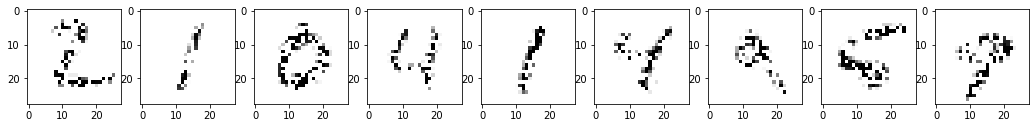

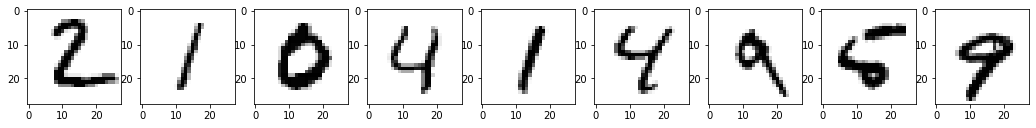

In [29]:
#Displaying images with noise
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
plt.show()


#Displaying original images
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test[i].reshape(28, 28), cmap="binary")
plt.show()

In [20]:
# define the model 

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 
model.add(MaxPooling2D((2, 2), padding='same'))
 
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

In [21]:
# compiling the model and display model summary

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = "accuracy")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         2312      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           5

In [22]:
# fitting the model with 50 epochs
model.fit(x_train_noisy, x_train, epochs = 50, batch_size = 64, validation_data = (x_test_noisy, x_test))

Epoch 1/50
938/938 [==============================] - 39s 11ms/step - loss: 0.0334 - accuracy: 0.8025 - val_loss: 0.0253 - val_accuracy: 0.8050
Epoch 2/50
938/938 [==============================] - 8s 9ms/step - loss: 0.0242 - accuracy: 0.8067 - val_loss: 0.0232 - val_accuracy: 0.8080
Epoch 3/50
938/938 [==============================] - 9s 9ms/step - loss: 0.0225 - accuracy: 0.8079 - val_loss: 0.0218 - val_accuracy: 0.8069
Epoch 4/50
938/938 [==============================] - 8s 9ms/step - loss: 0.0215 - accuracy: 0.8084 - val_loss: 0.0213 - val_accuracy: 0.8084
Epoch 5/50
938/938 [==============================] - 8s 9ms/step - loss: 0.0209 - accuracy: 0.8088 - val_loss: 0.0203 - val_accuracy: 0.8079
Epoch 6/50
938/938 [==============================] - 8s 9ms/step - loss: 0.0204 - accuracy: 0.8090 - val_loss: 0.0208 - val_accuracy: 0.8060
Epoch 7/50
938/938 [==============================] - 8s 9ms/step - loss: 0.0200 - accuracy: 0.8092 - val_loss: 0.0197 - val_accuracy: 0.8090
Epoc

In [23]:
# evaluate model on noisy and original data
model.evaluate(x_test_noisy, x_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0169 - accuracy: 0.8097


[0.016920549795031548, 0.8097327947616577]

In [24]:
# saving the model
model.save('denoising_autoencoder.model')

INFO:tensorflow:Assets written to: denoising_autoencoder.model/assets


**Denoising data with defined CNN model**

In [25]:
# predict on test noise data
no_noise_img = model.predict(x_test_noisy)

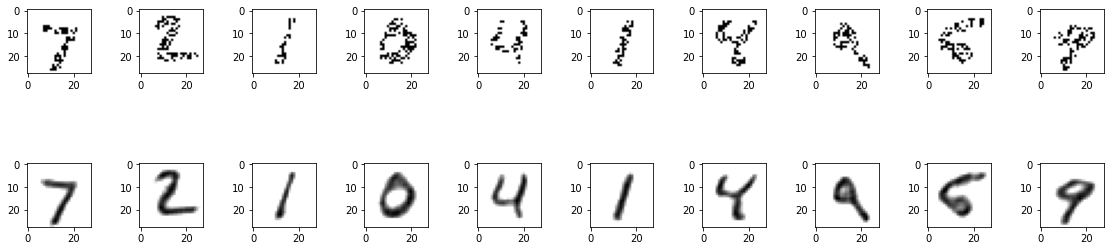

In [26]:
# display noisy and denoise data
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i].reshape(28, 28), cmap="binary")

plt.show()